# 대전시 범죄발생 분석에 따른 
## 안전한 지역 확인 분석 - 범죄 발생빈도가 낮은 지역 확인하기

In [1]:
import numpy as np
import pandas as pd

import xlrd, openpyxl
import csv

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
crime_2018_dj = pd.read_csv( '대전광역시지방경찰청_자치구별 5대범죄 발생 현황(2018).csv', encoding = 'cp949' )
crime_2018_dj

구분       죄종  발생건수
0    중구       살인     6
1    중구       강도    15
2    중구  강간,강제추행   135
3    중구       절도  1026
4    중구       폭력  2085
5    동구       살인     0
6    동구       강도    10
7    동구  강간,강제추행   135
8    동구       절도   999
9    동구       폭행  1568
10   서구       살인     5
11   서구       강도    14
12   서구  강간,강제추행   273
13   서구       절도  1757
14   서구       폭행  2946
15  대덕구       살인     1
16  대덕구       강도     6
17  대덕구  강간,강제추행    65
18  대덕구       절도   652
19  대덕구       폭행  1107
20  유성구       살인     3
21  유성구       강도     6
22  유성구  강간,강제추행   127
23  유성구       절도  1107
24  유성구       폭행  1496

In [4]:
crime_2018_dj = crime_2018_dj.replace( '폭력', '폭행' )
crime_2018_dj.set_index( ['구분','죄종'], inplace = True )
crime_2018_dj

발생건수
구분  죄종           
중구  살인          6
    강도         15
    강간,강제추행   135
    절도       1026
    폭행       2085
동구  살인          0
    강도         10
    강간,강제추행   135
    절도        999
    폭행       1568
서구  살인          5
    강도         14
    강간,강제추행   273
    절도       1757
    폭행       2946
대덕구 살인          1
    강도          6
    강간,강제추행    65
    절도        652
    폭행       1107
유성구 살인          3
    강도          6
    강간,강제추행   127
    절도       1107
    폭행       1496

In [5]:
crime_2018_dj = crime_2018_dj.unstack()
crime_2018_dj.index.name = '구별'

In [6]:
crime_2018_dj.count()

      죄종     
발생건수  강간,강제추행    5
      강도         5
      살인         5
      절도         5
      폭행         5
dtype: int64

In [7]:
crime_2018_dj.describe()

발생건수                                              
죄종        강간,강제추행         강도       살인           절도           폭행
count    5.000000   5.000000  5.00000     5.000000     5.000000
mean   147.000000  10.200000  3.00000  1108.200000  1840.400000
std     76.302031   4.266146  2.54951   402.412351   709.378108
min     65.000000   6.000000  0.00000   652.000000  1107.000000
25%    127.000000   6.000000  1.00000   999.000000  1496.000000
50%    135.000000  10.000000  3.00000  1026.000000  1568.000000
75%    135.000000  14.000000  5.00000  1107.000000  2085.000000
max    273.000000  15.000000  6.00000  1757.000000  2946.000000

In [8]:
crime_2018_dj.columns = [ '강제추행', '강도', '살인', '절도', '폭행' ] #포괄적 의미인 '강제추행'으로 컬럼명 변경
crime_2018_dj

강제추행  강도  살인    절도    폭행
구별                           
대덕구    65   6   1   652  1107
동구    135  10   0   999  1568
서구    273  14   5  1757  2946
유성구   127   6   3  1107  1496
중구    135  15   6  1026  2085

In [9]:
crime_2018_dj.loc[ :, '범죄'] = crime_2018_dj.sum( axis = 1 )
crime_2018_dj

강제추행  강도  살인    절도    폭행    범죄
구별                                 
대덕구    65   6   1   652  1107  1831
동구    135  10   0   999  1568  2712
서구    273  14   5  1757  2946  4995
유성구   127   6   3  1107  1496  2739
중구    135  15   6  1026  2085  3267

In [10]:
import platform
from matplotlib import font_manager, rc
plt.rcParams[ 'axes.unicode_minus' ] = False 

if platform.system() == 'Darwin':
    rc( 'font', family = 'AppleGothic' )
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' 
    font_name = font_manager.FontProperties( fname = path ).get_name()
    rc( 'font', family = font_name )
else:
    print( 'Unknown system...' )

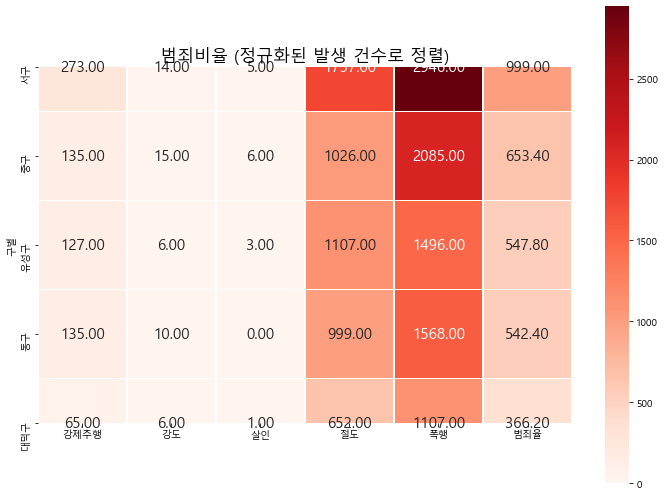

In [11]:
target_col = [ '강제추행', '강도', '살인', '절도', '폭행', '범죄율']

crime_2018_dj[ '범죄율' ] = crime_2018_dj[ '범죄' ] / 5
crime_2018_dj_sort = crime_2018_dj.sort_values( by= '범죄율', ascending = False )

plt.figure( figsize = ( 10, 7 ) )
sns.heatmap( crime_2018_dj_sort[target_col], annot=True, fmt='.2f', linewidths=.5,
             cmap= 'Reds', square = True, annot_kws = { "fontsize" : 15 } )
plt.title( '범죄비율 (정규화된 발생 건수로 정렬)', fontsize = 17 )
plt.tight_layout()
plt.show()
#heatmap 잘림현상 개선필요

In [12]:
crime_2018_dj_sort

강제추행  강도  살인    절도    폭행    범죄    범죄율
구별                                        
서구    273  14   5  1757  2946  4995  999.0
중구    135  15   6  1026  2085  3267  653.4
유성구   127   6   3  1107  1496  2739  547.8
동구    135  10   0   999  1568  2712  542.4
대덕구    65   6   1   652  1107  1831  366.2

In [ ]:
#범죄율과 총범죄건수가 비슷한 양상을 보여 범죄율 대신 범죄건수로 대체분석

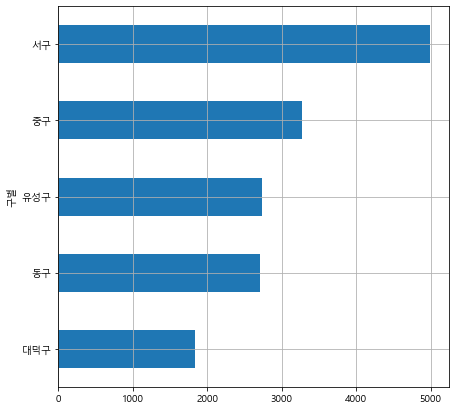

In [52]:
crime_2018_dj['범죄'].sort_values().plot( kind = 'barh' , figsize = ( 7, 7 ) , grid = True )

In [13]:
crime_2017_dj = pd.read_csv( '대전광역시지방경찰청_자치구별 5대범죄 발생 현황(2017).csv', encoding = 'cp949' )
crime_2017_dj

구분       죄종  발생건수
0    중구       살인     5
1    중구       강도    20
2    중구  강간,강제추행   144
3    중구       절도  1145
4    중구       폭력  2051
5    동구       살인     7
6    동구       강도     4
7    동구  강간,강제추행   121
8    동구       절도  1288
9    동구       폭행  1643
10   서구       살인     3
11   서구       강도    11
12   서구  강간,강제추행   249
13   서구       절도  1939
14   서구       폭행  2800
15  대덕구       살인     2
16  대덕구       강도     5
17  대덕구  강간,강제추행    66
18  대덕구       절도   769
19  대덕구       폭행  1032
20  유성구       살인     5
21  유성구       강도     2
22  유성구  강간,강제추행   119
23  유성구       절도  1073
24  유성구       폭행  1273

In [14]:
crime_2017_dj = crime_2017_dj.replace( '폭력', '폭행' )
crime_2017_dj.set_index( ['구분','죄종'], inplace = True )
crime_2017_dj

발생건수
구분  죄종           
중구  살인          5
    강도         20
    강간,강제추행   144
    절도       1145
    폭행       2051
동구  살인          7
    강도          4
    강간,강제추행   121
    절도       1288
    폭행       1643
서구  살인          3
    강도         11
    강간,강제추행   249
    절도       1939
    폭행       2800
대덕구 살인          2
    강도          5
    강간,강제추행    66
    절도        769
    폭행       1032
유성구 살인          5
    강도          2
    강간,강제추행   119
    절도       1073
    폭행       1273

In [15]:
crime_2017_dj = crime_2017_dj.unstack()
crime_2017_dj.index.name = '구별'

In [16]:
crime_2017_dj.count()

      죄종     
발생건수  강간,강제추행    5
      강도         5
      살인         5
      절도         5
      폭행         5
dtype: int64

In [17]:
crime_2017_dj.columns = [ '강제추행', '강도', '살인', '절도', '폭행' ]
crime_2017_dj

강제추행  강도  살인    절도    폭행
구별                           
대덕구    66   5   2   769  1032
동구    121   4   7  1288  1643
서구    249  11   3  1939  2800
유성구   119   2   5  1073  1273
중구    144  20   5  1145  2051

In [18]:
crime_2017_dj.loc[ :, '범죄'] = crime_2017_dj.sum( axis = 1 )
crime_2017_dj

강제추행  강도  살인    절도    폭행    범죄
구별                                 
대덕구    66   5   2   769  1032  1874
동구    121   4   7  1288  1643  3063
서구    249  11   3  1939  2800  5002
유성구   119   2   5  1073  1273  2472
중구    144  20   5  1145  2051  3365

In [19]:
crime_2016_dj = pd.read_csv( '대전광역시지방경찰청_자치구별 5대범죄 발생 현황(2016).csv', encoding = 'cp949' )
crime_2016_dj

구분       죄종  발생건수
0    중구       살인     3
1    중구       강도     6
2    중구  강간,강제추행   119
3    중구       절도  1473
4    중구       폭력  2248
5    동구       살인     7
6    동구       강도     7
7    동구  강간,강제추행   119
8    동구       절도  1339
9    동구       폭행  1668
10   서구       살인     4
11   서구       강도     9
12   서구  강간,강제추행   220
13   서구       절도  2115
14   서구       폭행  2855
15  대덕구       살인     6
16  대덕구       강도     8
17  대덕구  강간,강제추행    52
18  대덕구       절도   801
19  대덕구       폭행  1044
20  유성구       살인     5
21  유성구       강도     5
22  유성구  강간,강제추행   111
23  유성구       절도  1253
24  유성구       폭행  1358

In [20]:
crime_2016_dj = crime_2016_dj.replace( '폭력', '폭행' )
crime_2016_dj.set_index( ['구분','죄종'], inplace = True )
crime_2016_dj

발생건수
구분  죄종           
중구  살인          3
    강도          6
    강간,강제추행   119
    절도       1473
    폭행       2248
동구  살인          7
    강도          7
    강간,강제추행   119
    절도       1339
    폭행       1668
서구  살인          4
    강도          9
    강간,강제추행   220
    절도       2115
    폭행       2855
대덕구 살인          6
    강도          8
    강간,강제추행    52
    절도        801
    폭행       1044
유성구 살인          5
    강도          5
    강간,강제추행   111
    절도       1253
    폭행       1358

In [21]:
crime_2016_dj = crime_2016_dj.unstack()
crime_2016_dj.index.name = '구별'

In [22]:
crime_2016_dj.count()

      죄종     
발생건수  강간,강제추행    5
      강도         5
      살인         5
      절도         5
      폭행         5
dtype: int64

In [23]:
crime_2016_dj.columns = [ '강제추행', '강도', '살인', '절도', '폭행' ]
crime_2016_dj

강제추행  강도  살인    절도    폭행
구별                           
대덕구    52   8   6   801  1044
동구    119   7   7  1339  1668
서구    220   9   4  2115  2855
유성구   111   5   5  1253  1358
중구    119   6   3  1473  2248

In [24]:
crime_2016_dj.loc[ :, '범죄'] = crime_2016_dj.sum( axis = 1 )
crime_2016_dj

강제추행  강도  살인    절도    폭행    범죄
구별                                 
대덕구    52   8   6   801  1044  1911
동구    119   7   7  1339  1668  3140
서구    220   9   4  2115  2855  5203
유성구   111   5   5  1253  1358  2732
중구    119   6   3  1473  2248  3849

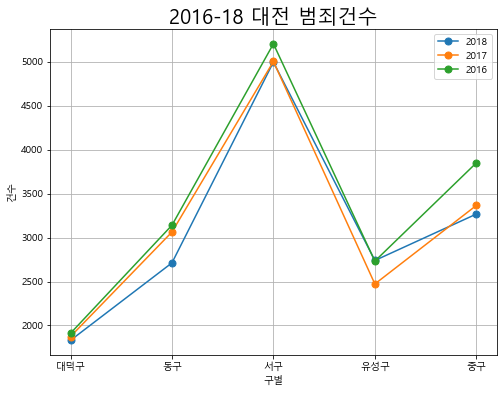

In [53]:
plt.figure( figsize = ( 8, 6 ) ) 
plt.grid( True )
plt.plot( crime_2018_dj['범죄'], label= '2018', marker='o', markersize= 7 )
plt.plot( crime_2017_dj['범죄'], label= '2017', marker='o', markersize= 7 )
plt.plot( crime_2016_dj['범죄'], label= '2016', marker='o', markersize= 7 )

plt.xlabel( '구별' )
plt.ylabel( '건수')

plt.title( "2016-18 대전의 범죄건수", fontsize = 20 )

plt.legend()

plt.show()   

* 2018년 포함, 최근 3년기준 대전지역 중 
* 서구의 범죄수가 가장 많았고,
* 대덕구의 범죄수가 가장 낮았다

* 한계점 : 범죄 종류별 지표가 없어서 5대 범죄를 모두 동일선상에 놓고 비교하게 됨
* 그러나 범죄 종류별 건수와 총 범죄 건수가 비슷한 양상을 보이기 때문에
* 굳이 종류별로 구분하지 않지 않아도 총 건수와 비슷한 결과를 보일 것으로 추정

* CCTV수와 범죄발생이 관계가 있다고 판단
* 인구대비 CCTV수가 가장 충분했던 대덕구가 범죄발생이 적고
* 인구대비 CCTV수가 가장 부족했던 서구는 범죄발생이 가장 빈번했다.